In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [ ]:
df = pd.read_csv('netflix1.csv')

In [ ]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


คำถามที่ 1 ในแต่ละปี Netflix มีแนวโน้มการนำเข้าภาพยนตร์และรายการโทรทัศน์เป็นอย่างไร

In [ ]:
d1 = pd.to_datetime(df['date_added'], format='%m/%d/%Y').dt.year
d1_count = (d1).value_counts().sort_index()
print(d1_count)

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: date_added, dtype: int64


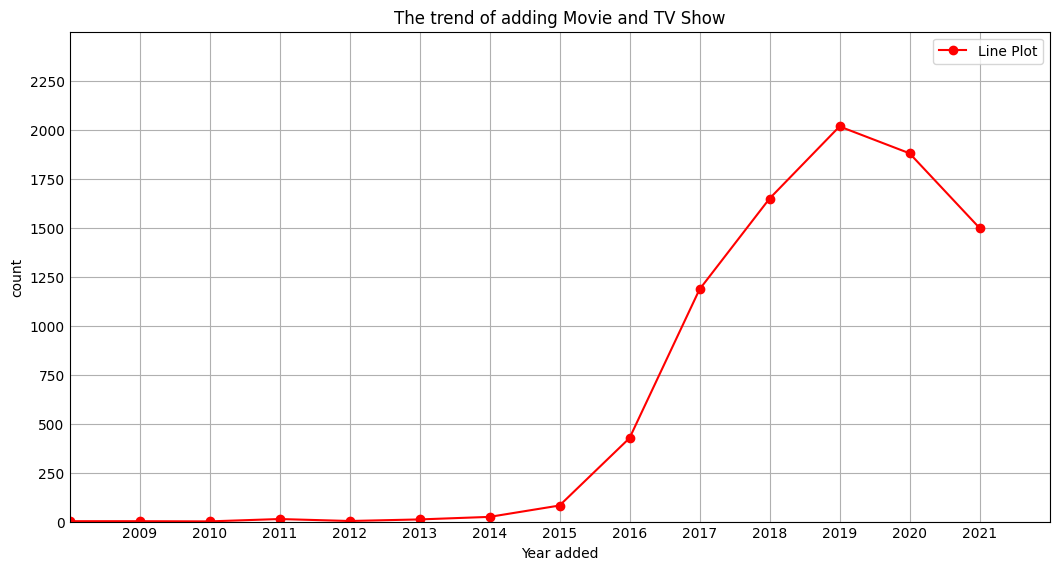

In [ ]:
x = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
y = [2, 2 ,1 ,13 ,3 ,11 ,24 ,82 ,426 ,1185 ,1648 ,2016 ,1879 ,1498]

fig, ax = plt.subplots(figsize=(10, 5))

ax.set(xlim=(0, 14), xticks=np.arange(1, 15),
       ylim=(0, 2500), yticks=np.arange(0, 2500, 250))

ax.plot(x, y, color='red', marker='o', label='Line Plot')

ax.set_xlabel("Year added")
ax.set_ylabel("count")
ax.set_title("The trend of adding Movie and TV Show")

ax.legend()

plt.show()

คำถามที่ 2 ประเทศใดที่มีภาพยนตร์และรายการโทรทัศน์รวมใน Netflix สูงที่สุด 5อันดับแรก

In [ ]:
d2 = df[df["country"] != 'Not Given']

d3 = d2.groupby(['country', 'type']).size().unstack(fill_value=0)
d3['Total'] = d3['Movie'] + d3['TV Show']
d3_count = d3.sort_values(by='Total', ascending=False).head(5)
print(d3_count)

type            Movie  TV Show  Total
country                              
United States    2395      845   3240
India             976       81   1057
United Kingdom    387      251    638
Pakistan           71      350    421
Canada            187       84    271


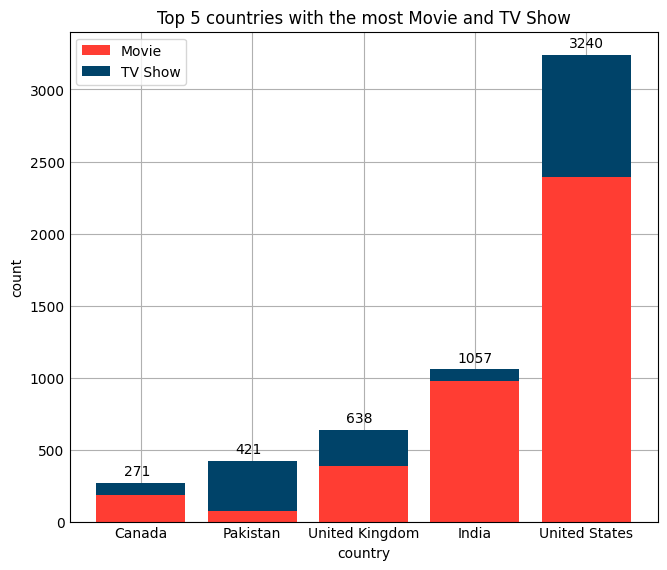

In [ ]:
N = 5
Movie_h = (187, 71, 387, 976, 2395)
TVShow_h = (84, 350, 251, 81, 845)
index = np.arange(N)
fig, ax = plt.subplots(figsize=(6, 5))
plt.bar(x=index, height=Movie_h, color='#FF3D33');
plt.bar(x=index, height=TVShow_h, color='#004369', bottom=Movie_h);
for i in range(len(Movie_h)):
    plt.text(i-0.155, Movie_h[i]+TVShow_h[i]+50, str(Movie_h[i]+TVShow_h[i]), fontsize=10)
plt.xticks(ticks=index, labels=['Canada', 'Pakistan', 'United Kingdom','India','United States']);
plt.xlabel("country")
plt.ylabel("count")
plt.title("Top 5 countries with the most Movie and TV Show")
plt.legend(labels=['Movie', 'TV Show'])

คำถามที่ 3 ผู้กำกับที่มีภาพยนตร์และรายการโทรทัศน์มากที่สุดใน Netflix มีสัดส่วนประเภทภาพยนตร์และรายการโทรทัศน์เป็นอย่างไร

In [ ]:
d4 = df[df["director"] != 'Not Given']
d5 = d4['director'].value_counts().head(5)
print(d5)

Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Marcus Raboy              16
Suhas Kadav               16
Name: director, dtype: int64


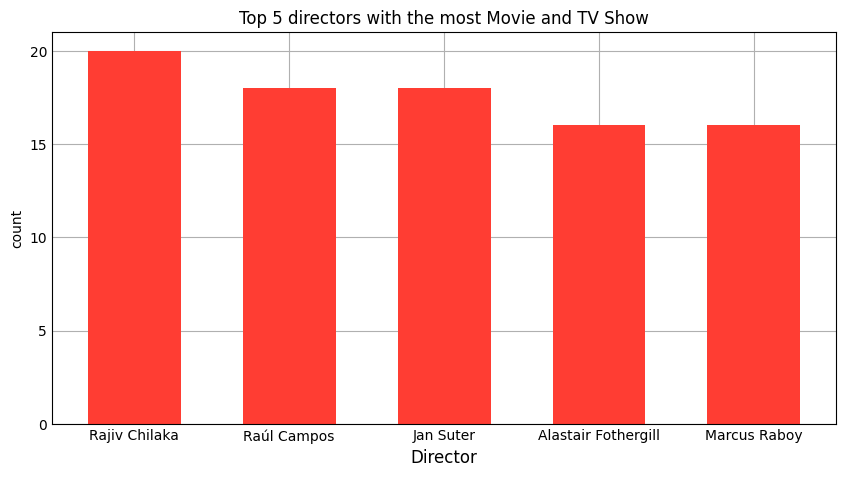

In [ ]:
director = ['Rajiv Chilaka', 'Raúl Campos', 'Jan Suter', 'Alastair Fothergill', 'Marcus Raboy', 'Suhas Kadav']
count = [20, 18, 18, 16, 16]

fig = plt.figure(figsize =(8, 4))

plt.bar(director[0:5], count[0:5], color='#FF3D33', width=0.6)

plt.yticks(np.arange(0, 21, 5))

plt.xlabel("Director",fontsize=12)
plt.ylabel("count")
plt.title("Top 5 directors with the most Movie and TV Show")

plt.show()

In [ ]:
d6 = d4[df["director"] == 'Rajiv Chilaka']
d7 = d6.groupby(['director', 'listed_in']).size()
print(d7)

director       listed_in                              
Rajiv Chilaka  Children & Family Movies                   18
               Children & Family Movies, Sports Movies     1
               Kids' TV                                    1
dtype: int64


<ipython-input-141-1a518ba58834>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d6 = d4[df["director"] == 'Rajiv Chilaka']


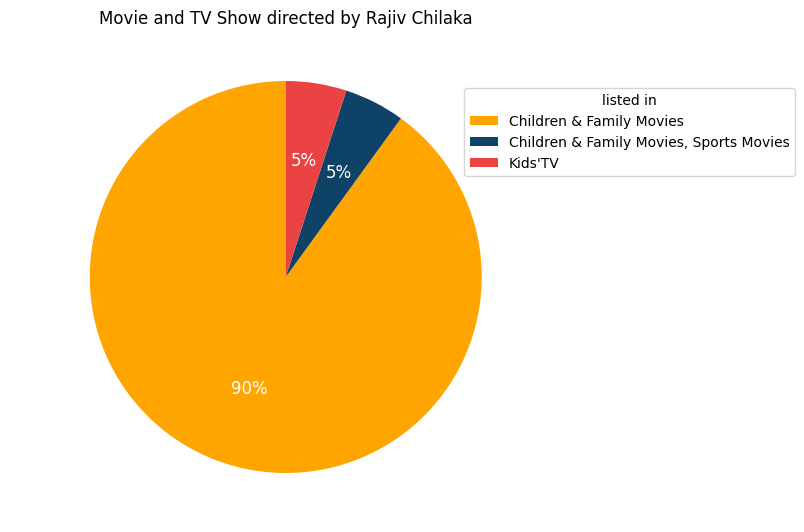

In [ ]:
y = np.array([18, 1, 1])
labels = ["Children & Family Movies", "Children & Family Movies, Sports Movies", "Kids'TV"]
colors = ['#FFA500', '#0F4267', '#EB4343']

fig, ax = plt.subplots(figsize=(5, 5))

text_props = {'fontsize': 12, 'color': 'white'}
plt.pie(y, labels = labels, startangle = 90, colors=colors,textprops=text_props, autopct='%1.0f%%')
plt.legend(title='listed in', loc='upper left', bbox_to_anchor=(0.85, 0.9))
plt.title('Movie and TV Show directed by Rajiv Chilaka', ha='center')
plt.show()